# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [3]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [4]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [5]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [13]:
#Combining the data with the target median values
bdata_df = np.insert(bdata.data, bdata.data.shape[1], bdata.target, axis = 1)

---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


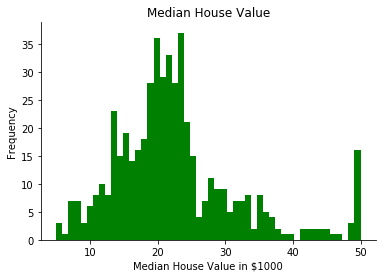

In [7]:
ax = plt.subplot(111)
ax.hist(bdata_df[:,13], bins = 50, color = 'green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Median House Value')
plt.xlabel('Median House Value in $1000')
plt.ylabel('Frequency')
plt.show()

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


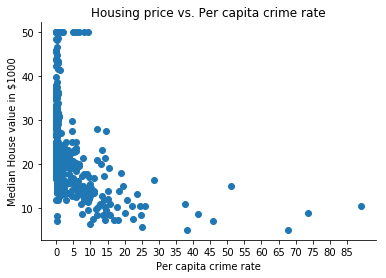

In [8]:
ax = plt.subplot(111)
ax.scatter(bdata_df[:,0],bdata_df[:,13])
plt.xlabel('Per capita crime rate')
plt.ylabel('Median House value in $1000')
plt.title('Housing price vs. Per capita crime rate')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(bdata_df[:,0]),max(bdata_df[:,0])+1,5.0))
plt.show()

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

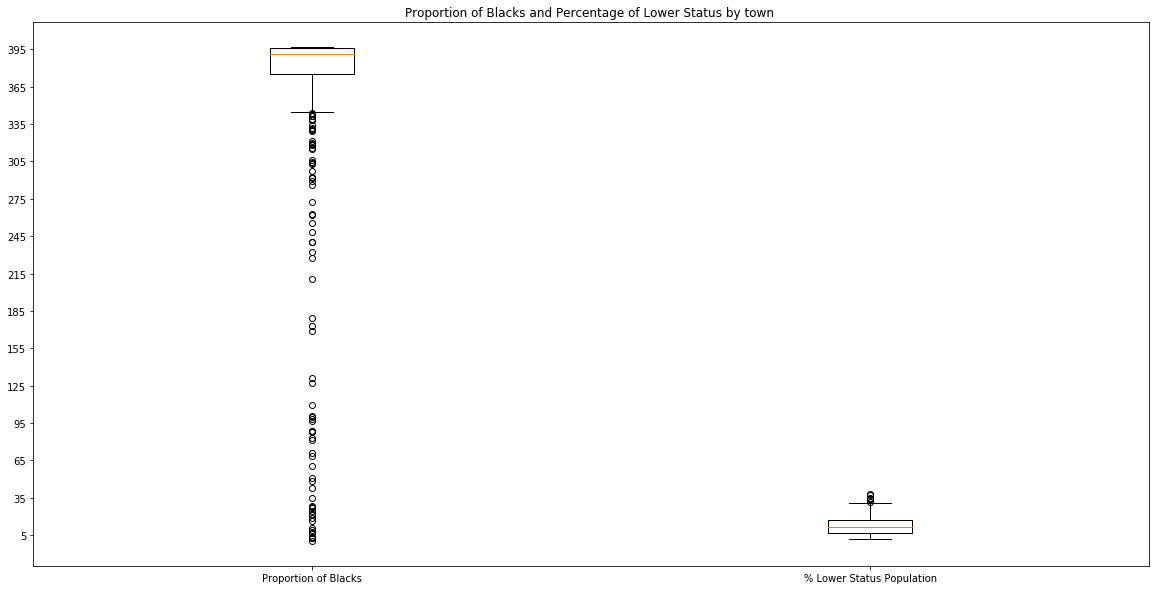

In [9]:
plt.figure(figsize=(20,10))
plt.boxplot(bdata_df[:,range(11,13)])
plt.xticks([1,2], ['Proportion of Blacks','% Lower Status Population'])
plt.yticks(np.arange(min(bdata_df[:,13]),max(bdata_df[:,11])+1,30.0))
plt.title('Proportion of Blacks and Percentage of Lower Status by town ')
plt.show()

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [14]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
def compute_rmse(predictions,yvalues):
    x = np.square(np.asarray(predictions)- np.asarray(yvalues))
    s = x.size + 0.0
    y = np.sqrt(np.sum(x) * np.reciprocal(s))
    return (round(y,2))    

In [15]:
print(compute_rmse((2,2,3),(0,2,6)))

2.08


### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [16]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

def train_test_split(data, percentage):
    np.random.shuffle(data)
    bdata_train = data[0:np.int(data.shape[0] * percentage),:]
    bdata_test = data[np.int(data.shape[0] * percentage):data.shape[0],:]
    return bdata_train, bdata_test  

In [17]:
bdata_train, bdata_test = train_test_split(bdata_df, 0.66)

In [18]:
print(bdata_train.shape)
print(bdata_test.shape)

(333, 14)
(173, 14)


### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [19]:
print("Root mean squared error of the training data is :",compute_rmse(np.repeat(bdata_train[:,13].mean(),bdata_train.shape[0]),bdata_train[:,13]))
print("Root mean Squared error of the test data is:",compute_rmse(np.repeat(bdata_train[:,13].mean(),bdata_test.shape[0]),bdata_test[:,13]))

Root mean squared error of the training data is : 8.58
Root mean Squared error of the test data is: 10.28


The RMSE of the test data is higher than the training data. I expected this value as the model based on the mean of the training data would not fit well with the test data. For example, the median values of the test data might vary largely as compared to the mean of the training data

##Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [23]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(5,9),1)
7

"""
def distance(x1,x2,L):
    x1 = np.asmatrix(x1)
    x2 = np.asmatrix(x2)
    t = np.power(abs(np.subtract(x1,x2)),L)
    return np.power(np.sum(t),1/L)

In [28]:
print ("L1 Manhattan Distance of (3,4) and (6,8) is ", distance((3,4),(6,8),1))
print ("L2 Euclidean Distance of (3,4) and (6,8) is ", distance((3,4),(6,8),2))
print ("L1 Manhattan Distance of (6,8) and (3,4) is ", distance((6,8),(3,4),1))
print ("L2 Euclidean Distance of (6,8) and (3,4) is ", distance((6,8),(3,4),2))

L1 Manhattan Distance of (3,4) and (6,8) is  7.0
L2 Euclidean Distance of (3,4) and (6,8) is  5.0
L1 Manhattan Distance of (6,8) and (3,4) is  7.0
L2 Euclidean Distance of (6,8) and (3,4) is  5.0


### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


In [35]:
# Import time to estimate the total time taken
import time
# Import operator to help with sort
import operator
def nn_predict(test_data, train_data, L):
#Record start time 
    start_time = time.time()
    # List for predicted values
    x = []
    for i in test_data:
    # List for nearest neighbour distances
        nn_dist = []
        for j in train_data:
        # Calculate euclidean distance
            euc_dist = distance(j[:-1],i[:-1],L)
            # Append to the nn_dist list
            nn_dist.append((j[j.shape[0]-1], euc_dist))
            # Sort the list by distance , so that we can pick the lowest distance
            nn_dist.sort(key = operator.itemgetter(1),reverse = False)
        # Append the lowest distance to the predicted value list
        x.append(nn_dist[0])
    # Convert to array
    x = np.array(x)
    # Calculate runtime
    elapsed_time = round(time.time() - start_time,2)
    #Return the predicted value, root mean squared error and the time take for run
    return x[:,0],compute_rmse(test_data[:,2],x[:,0]),elapsed_time

In [37]:
prediction , rmse , elapsed_time = nn_predict(bdata_test[:,(0,5,13)], bdata_train[:,(0,5,13)],2)

In [24]:
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds")

Root mean squared error is: 7.45
Total time for computation is: 3.19 Seconds


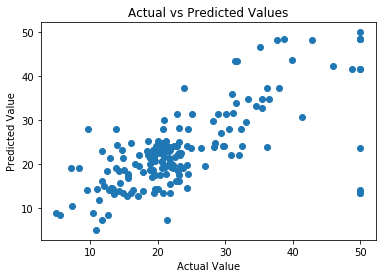

In [25]:
ax = plt.scatter(bdata_test[:,13],prediction)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.show()

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [26]:
def normalize (data):
    for i in range(0, data.shape[1] - 1):
        mean = data[:,i].mean()
        std = data[:,i].std()
        data[:,i] = (data[:,i] - mean)/std
    return data

In [27]:
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(0,5,13)]), normalize(bdata_train[:,[0,5,13]]),2)

In [29]:
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds")

Root mean squared error is: 7.73
Total time for computation is: 3.35 Seconds


### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [26]:
#2 features - NOX and TAX
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(4,9,13)]), normalize(bdata_train[:,(4,9,13)]),3)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds") 

#2 features - PTRATIO and LSTAT with L = 2
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(10,12,13)]), normalize(bdata_train[:,(10,12,13)]),2)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds")

#2 features - PTRATIO and LSTAT with L = 3
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(10,12,13)]), normalize(bdata_train[:,(10,12,13)]),3)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds")

#2 features - PTRATIO and LSTAT with L = 4
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(10,12,13)]), normalize(bdata_train[:,(10,12,13)]),4)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds")

#4 features - NOX, CHAS, PTRATIO and LSTAT with L = 2
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(4,3,10,12,13)]), normalize(bdata_train[:,(4,3,10,12,13)]),2)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds") 

#4 features - NOX, CHAS, PTRATIO and LSTAT with L = 3
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(4,3,10,12,13)]), normalize(bdata_train[:,(4,3,10,12,13)]),3)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds") 

#4 features - NOX, CHAS, PTRATIO and LSTAT with L = 4
prediction , rmse , elapsed_time = nn_predict(normalize(bdata_test[:,(4,3,10,12,13)]), normalize(bdata_train[:,(4,3,10,12,13)]),4)
print("Root mean squared error is:",rmse)
print("Total time for computation is:",elapsed_time,"Seconds") 

Root mean squared error is: 10.73
Total time for computation is: 3.38 Seconds
Root mean squared error is: 6.49
Total time for computation is: 3.36 Seconds
Root mean squared error is: 6.53
Total time for computation is: 3.18 Seconds
Root mean squared error is: 6.56
Total time for computation is: 3.24 Seconds
Root mean squared error is: 23.49
Total time for computation is: 3.13 Seconds
Root mean squared error is: 23.49
Total time for computation is: 3.36 Seconds
Root mean squared error is: 23.43
Total time for computation is: 3.29 Seconds


Through trial and error method, the rmse obtained for the features PTRATIO and LSTAT obtained the lowest rmse.
For these two features, the lowest value was obtained for the euclidean distance i.e. 6.49
For the model with 4 features, a high rmse of ~23 was obtained and remained similar across different L values.

It is seen that with different combinations, number of features and L values, the running time varies as well, although only by a small amount.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [30]:
def k_fold(data,L,m,k):
    rmse = 0
    elapsed_time = 0
    for i in range(10):
        test_data = data[range(int((i/10)* data.shape[0]), int(((i+1)/10)* data.shape[0])),:]
        train_data = np.delete(data, range(int((i/10)* data.shape[0]), int(((i+1)/10)* data.shape[0])), axis=0)
        if m=='knn':
            p,r,t = knn_predict(normalize(test_data[:,:]), normalize(train_data[:,:]),2,k)
        if m=='nn':
            p,r,t = nn_predict(normalize(test_data[:,:]),normalize(train_data[:,:]),2)
        rmse+=r
        elapsed_time+=t
    return(rmse/10),round(elapsed_time,2)

In [31]:
rmse,elapsed_time = k_fold(bdata_df[:,(0,5,13)],2,'nn',0)

In [32]:
print('Root mean squared error using cross-validation:',rmse)
print('Time taken for cross-validation:',elapsed_time)

Root mean squared error using cross-validation: 6.426
Time taken for cross-validation: 13.94


The RMSE obtained in the k-fold method is 6.426 which is lower than the 7.73 value obtained in the training-testing split. This shows that k-fold method delivers a better model. However, the run time for the k-fold method is higher than the training-testing split method.

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [33]:
# Import time to estimate the total time taken
import time
def knn_predict(test_data, train_data, L,k):
    #Record start time 
    start_time = time.time()
    # List for predicted values
    x = []
    for i in test_data:
        # List for nearest neighbour distances
        nn_dist = []
        for j in train_data:
            # Calculate euclidean distance
            euc_dist = distance(j[:-1],i[:-1],L)
            # Append to the nn_dist list
            nn_dist.append((j[j.shape[0]-1], euc_dist))
            # Sort the list by distance , so that we can pick the lowest distance
            nn_dist.sort(key = operator.itemgetter(1),reverse = False)
            # Append the lowest distance to the predicted value list
        x.append(np.mean(nn_dist[0:k],axis = 0))
    # Convert to array
    x = np.array(x)
    # Calculate runtime
    elapsed_time = round(time.time() - start_time,2)
    # Return the predicted value, root mean squared error and the time take for run
    return x[:,0],compute_rmse(test_data[:,2],x[:,0]),elapsed_time

In [34]:
r,t = k_fold(bdata_df[:,(0,5,13)],2,'knn',3)

In [35]:
print('Root mean squared error using K-nearest neigbour algorithm:',r)
print('Time taken for K-nearest neigbour algorithm:',t)

Root mean squared error using K-nearest neigbour algorithm: 5.882
Time taken for K-nearest neigbour algorithm: 13.88


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [36]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
bdata = bdata_df[:,(0,1,5,6,7,9,13)]

x=[]
y=[]

for k_value in range(1,26):
    # Calculating the RMSE and time taken 
    r,t = k_fold(bdata,2,'knn',k_value)
    # Appending the value of iteration to x list
    x.append(k_value)
    # Appending corresponding RMSE value to y list
    y.append(r)

x = np.array(x)
y = np.array(y)

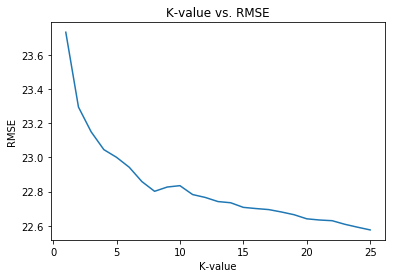

In [37]:
kr = np.stack((x,y),axis = 1)
plt.plot(kr[:,0],kr[:,1])
plt.xlabel('K-value')
plt.ylabel('RMSE')
plt.title('K-value vs. RMSE')
plt.show()

It is observed that as the K-value increases the RMSE value reduces.                                                    For this model, based on time and accuracy of rmse, K can be chosen in two ways:

1) While ignoring the time taken to train the model and aiming to obtain the lowest RMSE value, K = 25 would be a good choice.

2) Also, it is observed that the difference in RMSE values across K = 1 to 25 is not drastically different. There is a difference of ~1 rmse units between K = 1 and K = 25. There is an exponential drop in rmse between  K = 1 to 10. Beyond that, the RMSE value drops only by 0.2. Therefore considering time contraint, K = 10 would be a good choice